In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import fashion_mnist
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

#  Generating Training data

In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [3]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Class : 9')

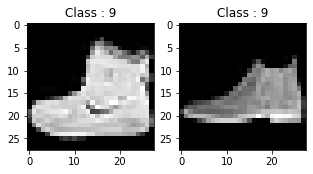

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Class : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Class : {}".format(test_Y[0]))

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [6]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


# Creating  CNN

In [8]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

fashion_model.save("fashion_model_dropout.h5py")

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

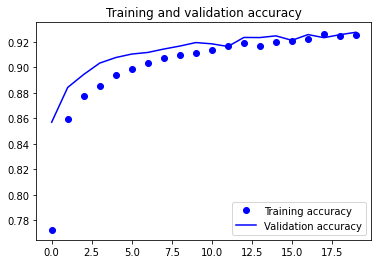

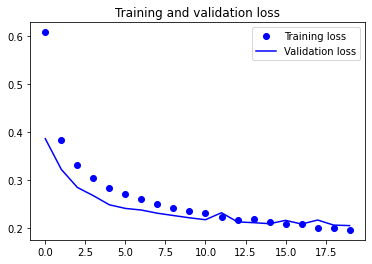

In [10]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Found 9168 correct labels


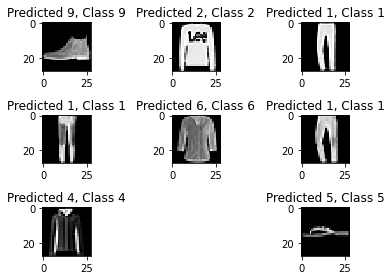

In [11]:
prediction = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(prediction),axis=1)

correct = np.where(predicted_classes==test_Y)[0]
print ("Found", len(correct), "correct labels")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 832 incorrect labels


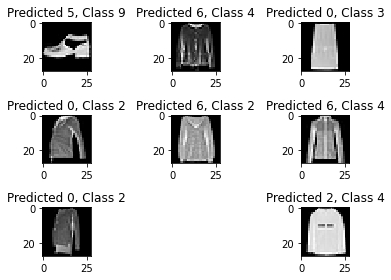

In [12]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found", len(incorrect), "incorrect labels")
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [13]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.90      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.86      0.87      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.90      0.84      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.79      0.75      0.77      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [14]:
def apply_mask(image, size=10, n_squares=1):
    h, w = image.shape
    new_image = np.copy(image)
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        new_image[y1:y2,x1:x2] = 0
    return new_image

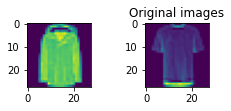

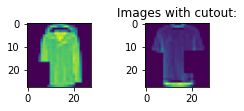

In [15]:
for i in range(2):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i+4].reshape(28,28))
plt.title("Original images")
plt.show()

for i in range(2):
    plt.subplot(330 + 1 + i)
    plt.imshow(apply_mask(train_X[i+4].reshape(28,28)))
plt.title("Images with cutout:")
plt.show()

# Cutout


In [16]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

test_X_c = np.empty_like(test_X)

for i in range(test_X_c.shape[0]):
    test_X_c[i] = apply_mask(test_X[i])


test_X = test_X_c

In [17]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)

Text(0.5, 1.0, 'Class : 9')

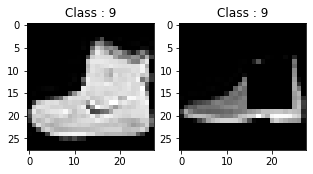

In [18]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Class : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Class : {}".format(test_Y[0]))

In [19]:
test_X = test_X.reshape(-1, 28,28, 1)

test_X = test_X.astype('float32')
test_X = test_X / 255.

In [20]:
# Change the labels from categorical to one-hot encoding
test_Y_one_hot = to_categorical(test_Y)


Found 8678 correct labels


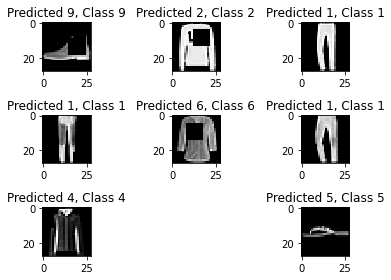

In [21]:
prev_predictions = predicted_classes
prediction = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(prediction),axis=1)

correct = np.where(predicted_classes==test_Y)[0]
print ("Found", len(correct), "correct labels")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 1322 incorrect labels
Number of incorrect predictions with high confidence(>80%): 203


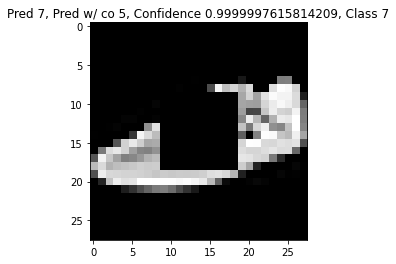

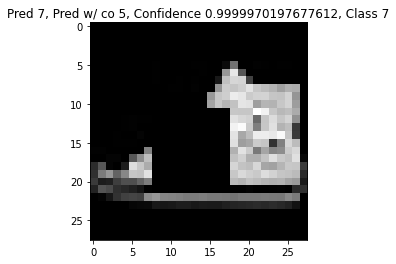

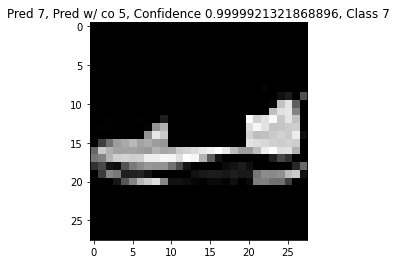

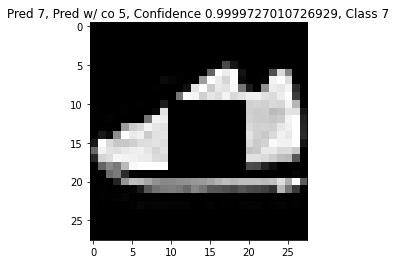

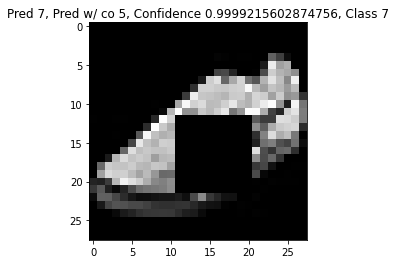

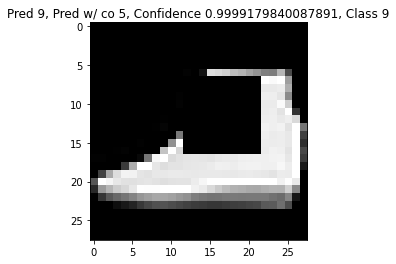

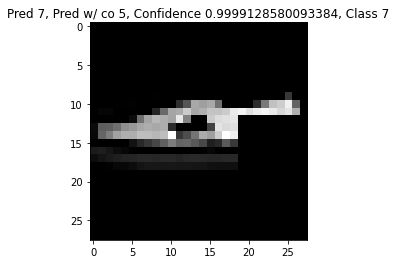

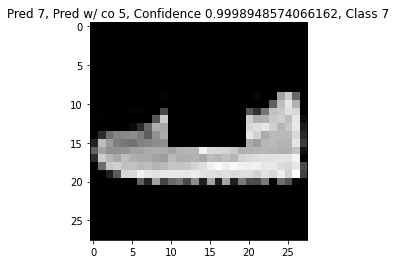

In [22]:
incorrect_wco = np.where(predicted_classes!=test_Y)[0]

max_class_pred = np.amax(prediction,axis=1)
max_wrong_class_pred=sorted([(max_class_pred[i],i) for i in incorrect_wco if prev_predictions[i]==test_Y[i]],reverse=True)

incorrect = incorrect_wco
print ("Found", len(incorrect), "incorrect labels")
count  = len([a[0] for a in max_wrong_class_pred if a[0] >= 0.8])
for i,(pred, incorrect) in enumerate(max_wrong_class_pred[:8]):
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred {}, Pred w/ co {}, Confidence {}, Class {}".format(prev_predictions[incorrect],predicted_classes[incorrect], max_class_pred[incorrect], test_Y[incorrect]))
    plt.show()

print("Number of incorrect predictions with high confidence(>80%):", count)

In [23]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.68      0.88      0.77      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.84      0.80      0.82      1000
     Class 3       0.87      0.91      0.89      1000
     Class 4       0.85      0.74      0.79      1000
     Class 5       0.87      0.98      0.92      1000
     Class 6       0.77      0.64      0.69      1000
     Class 7       0.94      0.90      0.92      1000
     Class 8       0.98      0.97      0.97      1000
     Class 9       0.96      0.89      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Gaussian noise

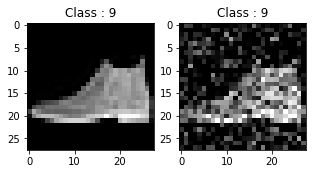

In [24]:
import torch
from skimage.util import random_noise

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

test_X = test_X.astype('float32')
test_X/=255
test_X_g = np.empty_like(test_X)
for i in range(test_X_c.shape[0]):
    test_X_g[i] = np.array(random_noise(test_X[i], mode='gaussian', mean=0, var=0.05, clip=True))


plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Class : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X_g[0,:,:], cmap='gray')
plt.title("Class : {}".format(test_Y[0]))

test_X = test_X_g

test_X = test_X.reshape(-1, 28,28, 1)

test_Y_one_hot = to_categorical(test_Y)

Found 5929 correct labels


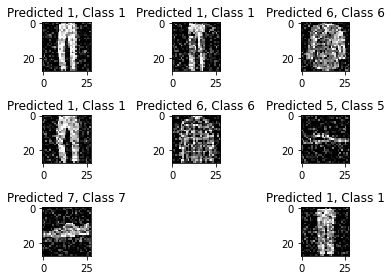

In [25]:
prev_predictions = predicted_classes
prediction = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(prediction),axis=1)

correct = np.where(predicted_classes==test_Y)[0]
print ("Found", len(correct), "correct labels")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 4071 incorrect labels
Number of incorrect predictions with high confidence(>80%): 1695


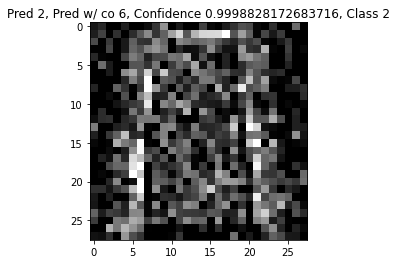

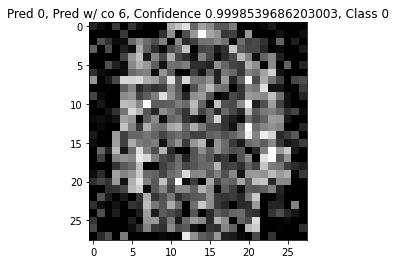

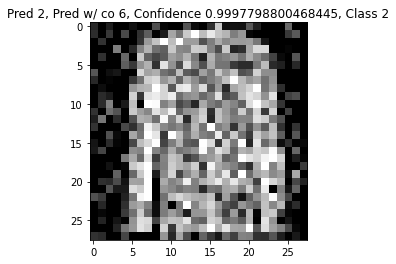

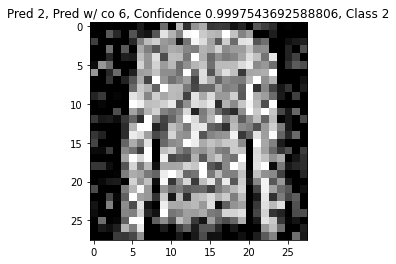

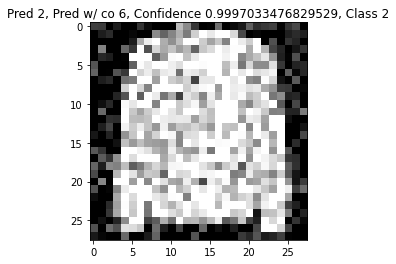

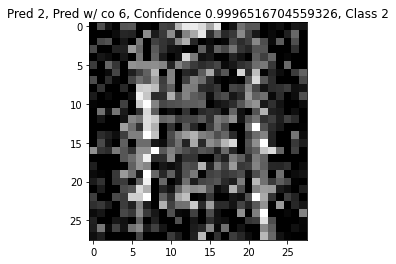

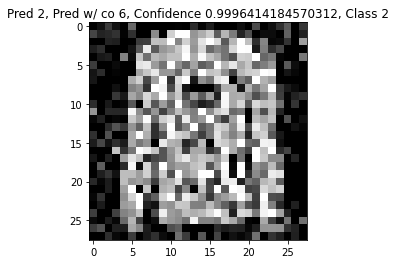

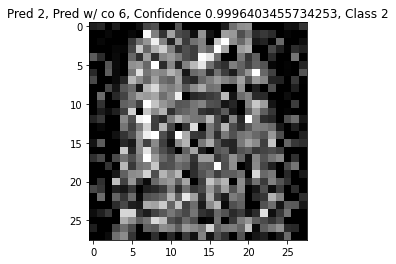

In [26]:
incorrect_wco = np.where(predicted_classes!=test_Y)[0]

max_class_pred = np.amax(prediction,axis=1)
max_wrong_class_pred=sorted([(max_class_pred[i],i) for i in incorrect_wco if prev_predictions[i]==test_Y[i]],reverse=True)

incorrect = incorrect_wco
print ("Found", len(incorrect), "incorrect labels")
count  = len([a[0] for a in max_wrong_class_pred if a[0] >= 0.8])
for i,(pred, incorrect) in enumerate(max_wrong_class_pred[:8]):
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred {}, Pred w/ co {}, Confidence {}, Class {}".format(prev_predictions[incorrect],predicted_classes[incorrect], max_class_pred[incorrect], test_Y[incorrect]))
    plt.show()

print("Number of incorrect predictions with high confidence(>80%):", count)

In [27]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.25      0.17      0.20      1000
     Class 1       0.96      0.96      0.96      1000
     Class 2       0.92      0.01      0.02      1000
     Class 3       0.90      0.73      0.80      1000
     Class 4       0.76      0.27      0.39      1000
     Class 5       0.94      0.70      0.80      1000
     Class 6       0.24      0.96      0.38      1000
     Class 7       0.98      0.54      0.70      1000
     Class 8       0.84      0.82      0.83      1000
     Class 9       0.97      0.77      0.86      1000

    accuracy                           0.59     10000
   macro avg       0.77      0.59      0.59     10000
weighted avg       0.77      0.59      0.59     10000



# Salt-and-pepper noise

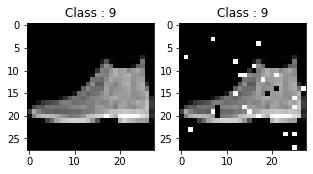

In [28]:
import torch
from skimage.util import random_noise

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

test_X = test_X.astype('float32')
test_X/=255
test_X_g = np.empty_like(test_X)
for i in range(test_X_c.shape[0]):
    test_X_g[i] = np.array(random_noise(test_X[i], mode='s&p', clip=True))

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Class : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X_g[0,:,:], cmap='gray')
plt.title("Class : {}".format(test_Y[0]))

test_X = test_X_g

test_X = test_X.reshape(-1, 28,28, 1)

test_Y_one_hot = to_categorical(test_Y)

Found 8081 correct labels


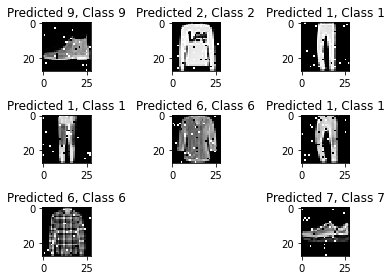

In [29]:
prev_predictions = predicted_classes
prediction = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(prediction),axis=1)

correct = np.where(predicted_classes==test_Y)[0]
print ("Found", len(correct), "correct labels")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 1919 incorrect labels
Number of incorrect predictions with high confidence(>80%): 59


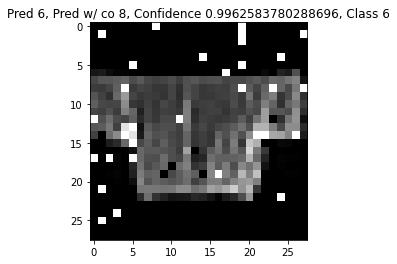

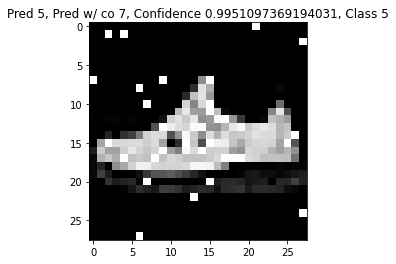

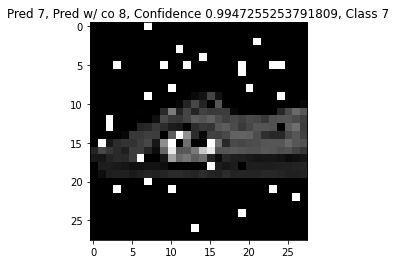

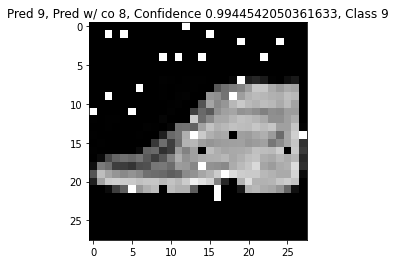

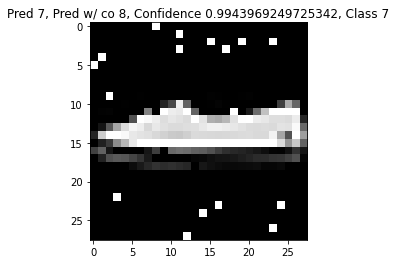

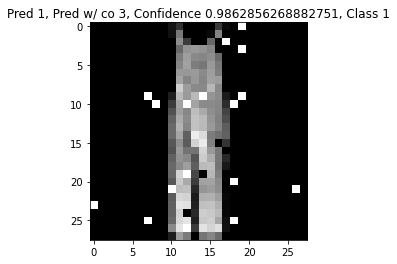

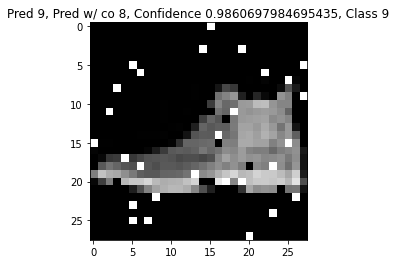

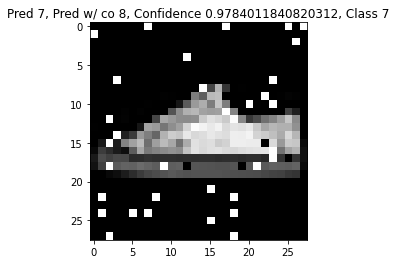

In [30]:
incorrect_wco = np.where(predicted_classes!=test_Y)[0]

max_class_pred = np.amax(prediction,axis=1)
max_wrong_class_pred=sorted([(max_class_pred[i],i) for i in incorrect_wco if prev_predictions[i]==test_Y[i]],reverse=True)

incorrect = incorrect_wco
print ("Found", len(incorrect), "incorrect labels")
count  = len([a[0] for a in max_wrong_class_pred if a[0] >= 0.8])
for i,(pred, incorrect) in enumerate(max_wrong_class_pred[:8]):
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred {}, Pred w/ co {}, Confidence {}, Class {}".format(prev_predictions[incorrect],predicted_classes[incorrect], max_class_pred[incorrect], test_Y[incorrect]))
    plt.show()

print("Number of incorrect predictions with high confidence(>80%):", count)

In [31]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))





              precision    recall  f1-score   support

     Class 0       0.57      0.72      0.64      1000
     Class 1       1.00      0.94      0.97      1000
     Class 2       0.93      0.44      0.60      1000
     Class 3       0.88      0.86      0.87      1000
     Class 4       0.82      0.71      0.76      1000
     Class 5       0.97      0.91      0.94      1000
     Class 6       0.51      0.80      0.62      1000
     Class 7       0.96      0.77      0.86      1000
     Class 8       0.85      0.98      0.91      1000
     Class 9       0.92      0.95      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.84      0.81      0.81     10000
weighted avg       0.84      0.81      0.81     10000

